In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn import preprocessing
from sklearn import metrics

%config InlineBackend.figure_format = 'png' 
%matplotlib inline

sns.set(style="darkgrid")

In [35]:
#Import scikit-learn dataset library
from sklearn import datasets

# Import train_test_split function
from sklearn.model_selection import train_test_split

train = pd.read_csv("test.csv")

train.head()


,url_relevant,have_more_than_one_new_component_parent,url_relevant_parent,have_term_criterion_parent,have_one_item_criterio_parent,have_more_item_criterio_parent,url_relevant_brother,have_more_than_one_new_component_brother,have_one_item_criterio_brother,have_more_item_criterio_brother,have_term_criterion_brother,result
0,1,0,0,1,1,0,1,1,0,1,1,identification_item
1,1,1,0,1,1,0,1,1,0,1,1,identification_item
2,1,1,0,1,1,0,1,1,0,1,1,identification_item
3,1,0,0,1,1,0,1,1,0,1,1,identification_item
4,1,1,0,1,1,0,1,1,0,1,1,identification_item


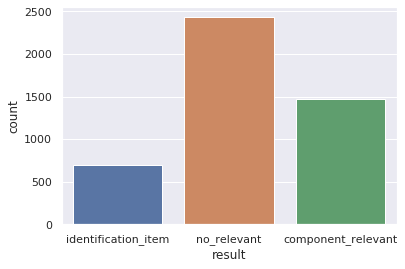

In [36]:
sns.countplot(x="result", data=train)

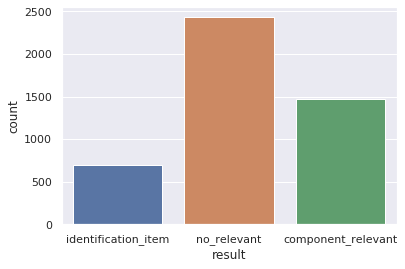

In [37]:
count_class_0, count_class_1, cout_class_2 = train.result.value_counts()
df_class_0 = train[train['result'] == "no_relevant"]
df_class_1 = train[train['result'] == "component_relevant"]
df_class_2 = train[train['result'] == "identification_item"]

df_class_0_under = df_class_0.sample(cout_class_2, replace=True)
df_class_1_under = df_class_1.sample(cout_class_2, replace=True)

train_balanceado = pd.concat([df_class_0_under, df_class_2], axis=0)
train_balanceado = pd.concat([train_balanceado, df_class_1_under], axis=0)

train_balanceado = train
sns.countplot(x="result", data=train_balanceado)

In [29]:
le = preprocessing.LabelEncoder()
train['result'] = le.fit_transform(train['result'])
train_balanceado['result'] = le.fit_transform(train_balanceado['result'])


In [30]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import MultinomialNB


features = train_balanceado.drop('result', axis=1)
labels = train_balanceado.result

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3,random_state=109) # 70% training and 30% test



#Create a Gaussian Classifier
gnb = MultinomialNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = gnb.predict(X_test)


Text(34.82000000000001, 0.5, 'Predicted')

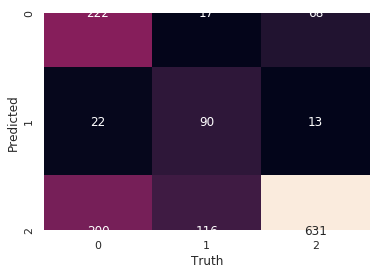

In [31]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix


mat = confusion_matrix(y_pred, y_test)
names = np.unique(y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [33]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6838288614938361
